# Exercicio → Previsão do preço de ações
Neste exercício você vai aprender a capturar o preço de ações/ativos disponíveis no S&P500 e a estimar o preço de fechamento do dia posterior utilizando algumas técnicas estatísticas padrões (baseline) e Deep Learning.

In [ ]:
!pip install yfinance

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
import numpy as np

In [3]:
# Definição do ativo

#tickerSymbol = 'MSFT' # Microsoft
tickerSymbol = 'BTC-USD' # BitCoin

# Data de busca das ações
start = '2015-12-10'
end = '2020-12-10'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start=start, end=end)

tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-12-10,417.988007,419.509003,411.548004,415.479004,52138900,0,0
2015-12-11,415.281006,451.937988,415.281006,451.937988,110944000,0,0
2015-12-12,452.334991,469.102997,410.740997,434.997009,131969000,0,0
2015-12-13,431.660004,441.679993,426.268005,433.755005,55050600,0,0
2015-12-14,433.272003,447.141998,430.455994,444.182007,130496000,0,0
...,...,...,...,...,...,...,...
2020-12-06,19154.179688,19390.500000,18897.894531,19345.121094,25293775714,0,0
2020-12-07,19343.128906,19411.828125,18931.142578,19191.630859,26896357742,0,0
2020-12-08,19191.529297,19283.478516,18269.945312,18321.144531,31692288756,0,0


In [4]:
import matplotlib.dates as mdates

def plot_stock(dataframe, feature, name='Stock', interval_day=60):
    
    x = dataframe.index

    # plots which ever catagory you entered above
    y = dataframe[feature]

    plt.figure(figsize=(12, 6))

    # display the date properly
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    # x axis tick every 60 days
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=interval_day))

    plt.plot(x, y)  # plots the x and y
    plt.grid(True)  # turns on axis grid
    # rotates the x axis ticks 90 degress and font size 10
    plt.xticks(rotation=90, fontsize=10)
    plt.title(name)  # prints the title on the top
    plt.ylabel(feature + ' Price')  # labels y axis
    plt.xlabel('Date')  # labels x axis

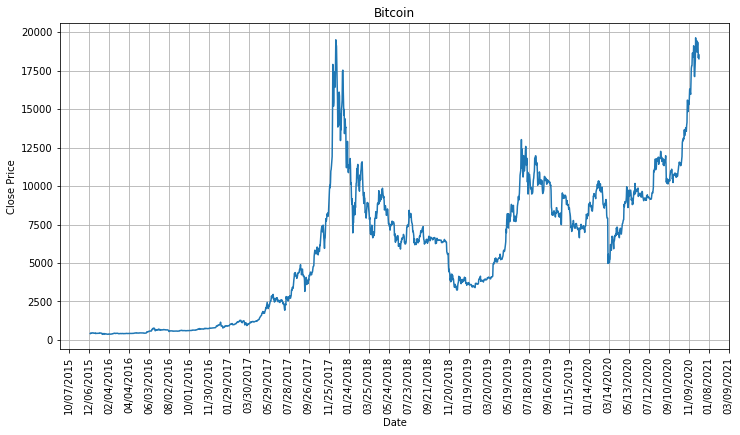

In [5]:
plot_stock(tickerDf, 'Close', name='Bitcoin')

Vamos nos livrar das colunas que não são do nosso interesse e vamos criar uma coluna com o valor médio da ação no dia.


In [6]:
tickerDf = tickerDf.drop(labels=['Dividends', 'Stock Splits'], axis=1)
tickerDf['Mid'] = (tickerDf['High'] + tickerDf['Low'])/2

tickerDf.head()

,Open,High,Low,Close,Volume,Mid
Date,,,,,,
2015-12-10,417.988007,419.509003,411.548004,415.479004,52138900,415.528503
2015-12-11,415.281006,451.937988,415.281006,451.937988,110944000,433.609497
2015-12-12,452.334991,469.102997,410.740997,434.997009,131969000,439.921997
2015-12-13,431.660004,441.679993,426.268005,433.755005,55050600,433.973999
2015-12-14,433.272003,447.141998,430.455994,444.182007,130496000,438.798996


Agora vamos criar uma coluna com o percentual de mudança dos valores de
fechamento dos dias

In [7]:
percent_change_closing_price = tickerDf['Close'].pct_change()
percent_change_closing_price.fillna(0, inplace=True)

tickerDf['PC_change'] = pd.DataFrame(percent_change_closing_price)
tickerDf.head()

,Open,High,Low,Close,Volume,Mid,PC_change
Date,,,,,,,
2015-12-10,417.988007,419.509003,411.548004,415.479004,52138900,415.528503,0.000000
2015-12-11,415.281006,451.937988,415.281006,451.937988,110944000,433.609497,0.087752
2015-12-12,452.334991,469.102997,410.740997,434.997009,131969000,439.921997,-0.037485
2015-12-13,431.660004,441.679993,426.268005,433.755005,55050600,433.973999,-0.002855
2015-12-14,433.272003,447.141998,430.455994,444.182007,130496000,438.798996,0.024039


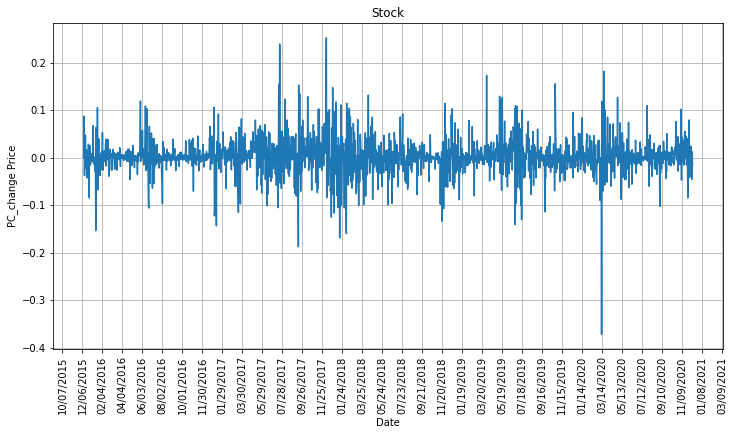

In [8]:
plot_stock(tickerDf, 'PC_change')

Uma vez que vamos prever o valor de fechamento, vamos dar uma olhada em como uma média móvel se comporta com os dados

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  


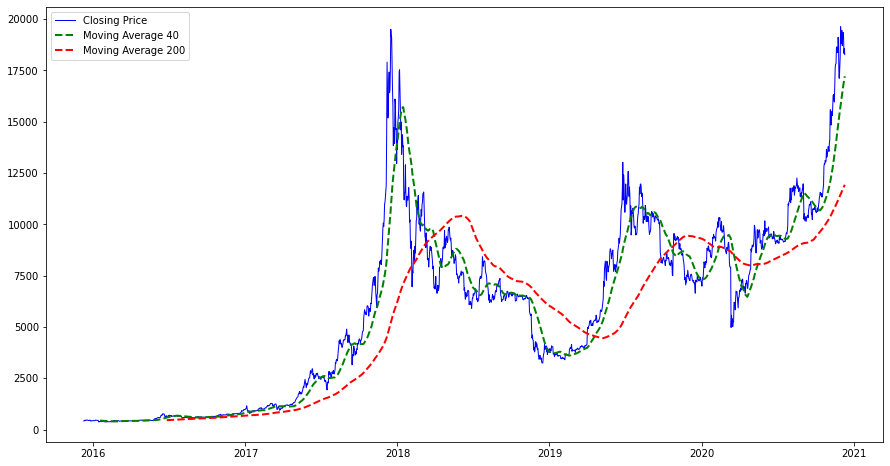

In [10]:
closing_price = tickerDf['Close']
moving_avg_40 = closing_price.rolling(window=40).mean()
moving_avg_200 = closing_price.rolling(window=200).mean()
plt.figure(figsize=(15,8))
df = pd.DataFrame({'x': tickerDf.index , 'y0': tickerDf['Close'], 'y1': moving_avg_40, 'y2': moving_avg_200})
plt.plot( 'x', 'y0', data=df, marker='', color='blue', linewidth=1, label = "Closing Price")
plt.plot( 'x', 'y1', data=df, marker='', color='green', linewidth=2, linestyle='dashed', label = "Moving Average 40")
plt.plot( 'x', 'y2', data=df, marker='', color='red', linewidth=2, linestyle='dashed', label="Moving Average 200")
plt.legend()
plt.show()

## Experimentos relacionados com uma abordagem mais "estatística" para previsão do preço de fechamento

### Métodos baseline:
- Média móvel
- Suavizamento Exponencial Simples
- ARIMA


### Métricas de Avaliação
- MSE (Erro médio quadrático)
- MAE (Erro médio absoluto)
- RMSE (Raiz do erro médio quadrático)
- POCID (Predição de mudança de direção)

In [11]:
# Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error

def POCID(z, z_hat):
    p = 0
    for t in range(1, len(z)):
        aux = (z_hat[t] - z_hat[t - 1]) * (z[t] - z[t - 1])
        p += 1 if aux > 0 else 0
    return p/(len(z) - 1) * 100

Pipeline de Previsão para Séries Temporais

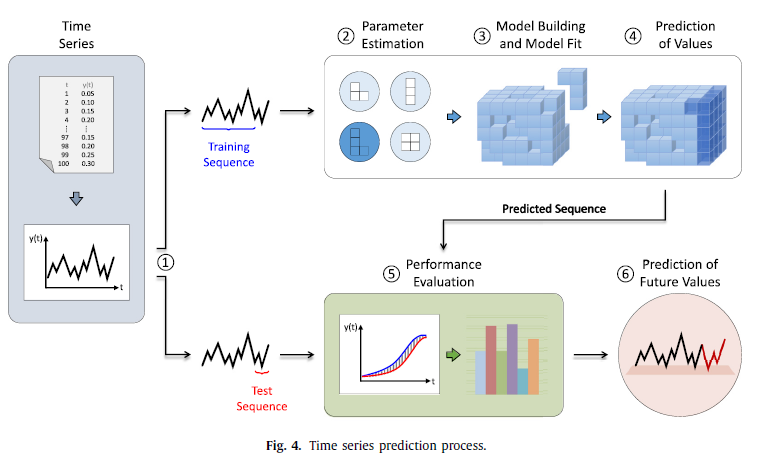

In [24]:
from sklearn.preprocessing import MinMaxScaler # It scales the data between 0 and 1

# Let's apply some models to predict closing prices

# Splitting data into train/test

training_size = round(tickerDf.shape[0]*0.9)
test_size = tickerDf.shape[0] - training_size

train_data = np.array(closing_price[:training_size])
test_data = np.array(closing_price[training_size:])

print(train_data.shape)
print(test_data.shape)

(1645,)
(183,)


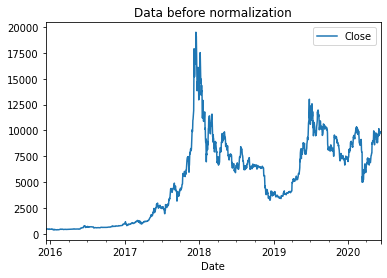

In [13]:
pd.DataFrame(closing_price[:training_size]).plot()    
plt.title("Data before normalization")    
plt.show()

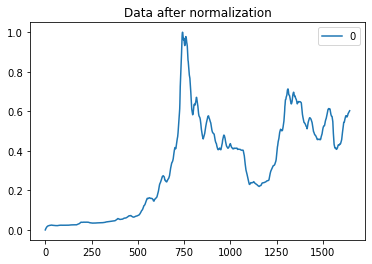

In [28]:
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# Reshape both train and test data
train_data = train_data.reshape(-1)
test_data = test_data.reshape(-1)

pd.DataFrame(train_data).plot()    
plt.title("Data after normalization")    
plt.show()

 Para uma melhor estimação do modelo, vamos suavizar os dados.
 
 O parâmetro de ajuste da suavização é o Gamma.

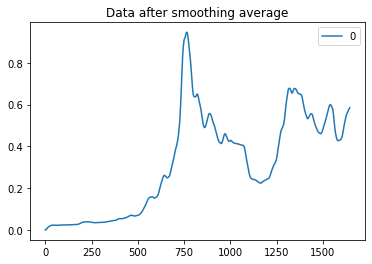

In [29]:
gamma = 0.1
EMA = 0.0
for ti in range(len(train_data)):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA

pd.DataFrame(train_data).plot()    
plt.title("Data after smoothing average")    
plt.show()

# Create a full version of the train/test data for visualization and test purposes
all_mid_data = scaler.inverse_transform(np.concatenate([train_data,test_data], axis=0).reshape(-1,1))

### Experimento 1 (a): Média móvel aplicada aos dados de treinamento para avaliar o melhor tamanho de janela

Mean Absolute Error (Testing Data): 138.225840
Root Mean Squared Error (Testing Data): 241.940965
Hit Rate Prediction of Change in Direction (POCID): 91.370869


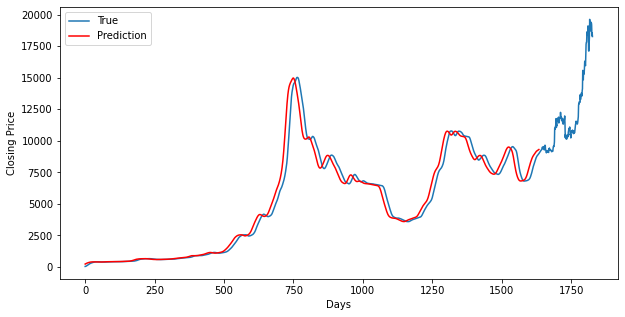

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

window_size = 10
predictions = list()

def moving_window_average(data, window_len):
    mov_avg_prediction = np.mean(data[-window_len:])
    return mov_avg_prediction

for timepoint in range(window_size, train_data.size):
    ActualValue = train_data[timepoint]
    forecast = moving_window_average(train_data[timepoint:window_size+timepoint], window_size)
    predictions.append(forecast)

horizon_predicted = np.array(predictions).reshape(-1,1)
horizon_predicted = scaler.inverse_transform(horizon_predicted)

inverse_test_data = train_data[window_size:].reshape(-1,1)
inverse_test_data = scaler.inverse_transform(inverse_test_data)

MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(mean_squared_error(inverse_test_data, horizon_predicted))
POCID_metric = POCID(inverse_test_data, horizon_predicted)

print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print('Hit Rate Prediction of Change in Direction (POCID): %.6f' % POCID_metric)

plt.figure(figsize = (10,5))
plt.plot(range(tickerDf.shape[0]), all_mid_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()

### Experimento 1 (b): Média móvel  - Previsão do próximo valor de fechamento com dados de teste

Mean Absolute Error (Testing Data): 485.101661
Root Mean Squared Error (Testing Data): 675.445737
Hit Rate Prediction of Change in Direction(POCID): 48.901099


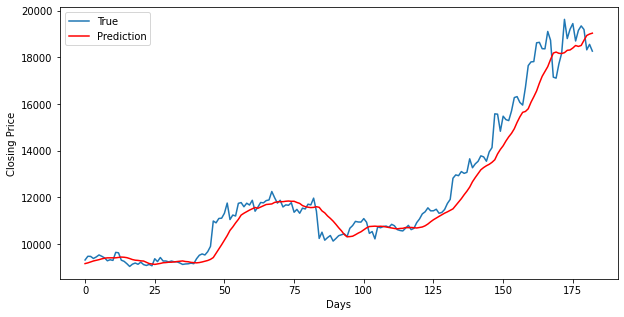

In [34]:
window_size = 10
Actual = [x for x in train_data]
predictions = list()

for timepoint in range(len(test_data)):
    ActualValue =  test_data[timepoint]
    forecast = moving_window_average(Actual, window_size) 
    #print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    predictions.append(forecast)
    Actual.append(ActualValue) 

horizon_predicted = np.array(predictions).reshape(-1,1)
horizon_predicted = scaler.inverse_transform(horizon_predicted)

inverse_test_data = test_data.reshape(-1,1)
inverse_test_data = scaler.inverse_transform(inverse_test_data)

MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(mean_squared_error(inverse_test_data, horizon_predicted))
POCID_metric = POCID(inverse_test_data, horizon_predicted)

print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print('Hit Rate Prediction of Change in Direction (POCID): %.6f' % POCID_metric)

plt.figure(figsize = (10,5))
plt.plot(inverse_test_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()

### Experimento 2 (a): Suavizamento exponencial médio aplicada aos dados de treinamento para avaliar constante de suavizamento

Seleção da constante de suavizamento


Mean Absolute Error (Testing Data): 61.769943
Root Mean Squared Error (Testing Data): 108.488427
Hit Rate Prediction of Change in Direction(POCID): 95.556908


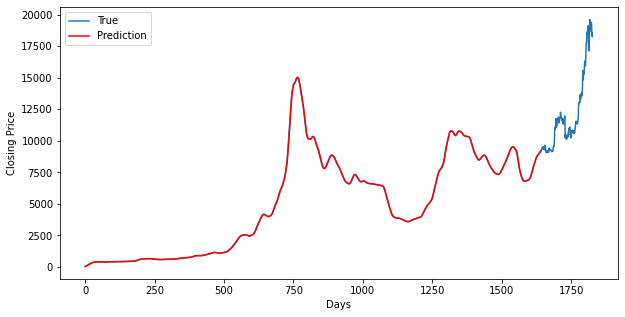

In [35]:
smoothing_constant = 0.5

predictions = list()
last_prediction = train_data[0]

for timepoint in range(1, train_data.size):
    last_prediction = last_prediction * smoothing_constant + (1.0 - smoothing_constant) * train_data[timepoint-1]
    predictions.append(last_prediction)

horizon_predicted = np.array(predictions).reshape(-1,1)
horizon_predicted = scaler.inverse_transform(horizon_predicted)

inverse_test_data = train_data[1:].reshape(-1,1)
inverse_test_data = scaler.inverse_transform(inverse_test_data)

MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(mean_squared_error(inverse_test_data, horizon_predicted))
POCID_metric = POCID(inverse_test_data, horizon_predicted)

print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print('Hit Rate Prediction of Change in Direction(POCID): %.6f' % POCID_metric)

plt.figure(figsize = (10,5))
plt.plot(range(tickerDf.shape[0]), all_mid_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()

### Experimento 2 (b): Suavizamento exponencial médio - Previsão do próximo valor de fechamento com dados de teste

Mean Absolute Error (Testing Data): 256.112937
Root Mean Squared Error (Testing Data): 402.097752
Hit Rate Prediction of Change in Direction(POCID): 46.961326


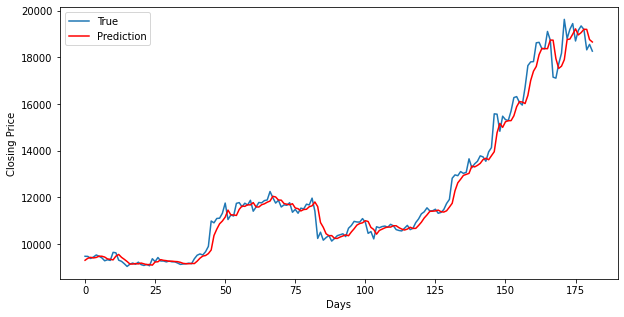

In [36]:
smoothing_constant = 0.5

Actual = [train_data[-1:]]
predictions = list()
last_prediction = train_data[-1]

for timepoint in range(1, len(test_data)):
    ActualValue =  test_data[timepoint]
    last_prediction = last_prediction * smoothing_constant + (1.0 - smoothing_constant) * Actual[timepoint-1]    
    predictions.append(last_prediction)
    Actual.append(ActualValue) 

horizon_predicted = np.array(predictions).reshape(-1,1)
horizon_predicted = scaler.inverse_transform(horizon_predicted)

inverse_test_data = test_data[1:].reshape(-1,1)
inverse_test_data = scaler.inverse_transform(inverse_test_data)

MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(mean_squared_error(inverse_test_data, horizon_predicted))
POCID_metric = POCID(inverse_test_data, horizon_predicted)

print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print('Hit Rate Prediction of Change in Direction(POCID): %.6f' % POCID_metric)

plt.figure(figsize = (10,5))
plt.plot(inverse_test_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()

### Experiment 3: ARIMA - Ajuste e previsão do próximo valor de fechamento

Parameters 
* p: The number of lag observations included in the model, also called the lag order.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.

Tip -> Follow the Box-Jenkins Methodology to find optimal parameters.

In [ ]:
pd.plotting.autocorrelation_plot(pd.DataFrame(train_data))
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check m

Mean Absolute Error (Testing Data): 271.712780
Root Mean Squared Error (Testing Data): 392.718271
Hit Rate Prediction of Change in Direction(POCID): 42.857143


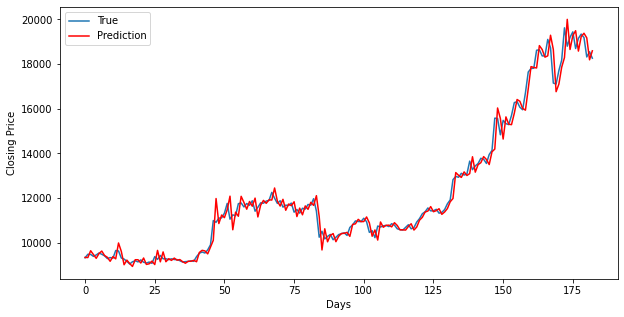

In [38]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

Actual = [x for x in train_data]
predictions = list()

for timepoint in range(len(test_data)):
    ActualValue =  test_data[timepoint]
    Prediction = StartARIMAForecasting(Actual, 1, 1, 0) 
    predictions.append(Prediction)
    Actual.append(ActualValue)

horizon_predicted = np.array(predictions).reshape(-1,1)
horizon_predicted = scaler.inverse_transform(horizon_predicted)
inverse_test_data = test_data.reshape(-1,1)
inverse_test_data = scaler.inverse_transform(inverse_test_data)

MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(mean_squared_error(inverse_test_data, horizon_predicted))
POCID_metric = POCID(inverse_test_data, horizon_predicted)

print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print('Hit Rate Prediction of Change in Direction(POCID): %.6f' % POCID_metric)

plt.figure(figsize = (10,5))
plt.plot(inverse_test_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()

### Experiment 4: Biblioteca Prophet do Facebook

"Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well."

O Prophet necessita, como entrada, um dataframe com uma coluna com as datas de capturação das amostras e outra com os valores das amostras.



In [40]:
Df = pd.DataFrame({'ds': tickerDf[:training_size].index, 'y': tickerDf['Close'][:training_size]})
Df.tail()

,ds,y
Date,,
2020-06-06,2020-06-06,9653.679688
2020-06-07,2020-06-07,9758.852539
2020-06-08,2020-06-08,9771.489258
2020-06-09,2020-06-09,9795.700195
2020-06-10,2020-06-10,9870.094727


In [43]:
from fbprophet import Prophet

model = Prophet()
model.fit(Df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Vamos fazer uma previsão para o futuro com uma janela do tamanho do "test_size"

In [44]:
future = model.make_future_dataframe(periods=test_size)
future.tail()

,ds
1823,2020-12-06
1824,2020-12-07
1825,2020-12-08
1826,2020-12-09
1827,2020-12-10


O valor de previsão (forecast) para o valor de interesse pode ser obtido ao olhar a variável 'yhat' no dataframe.

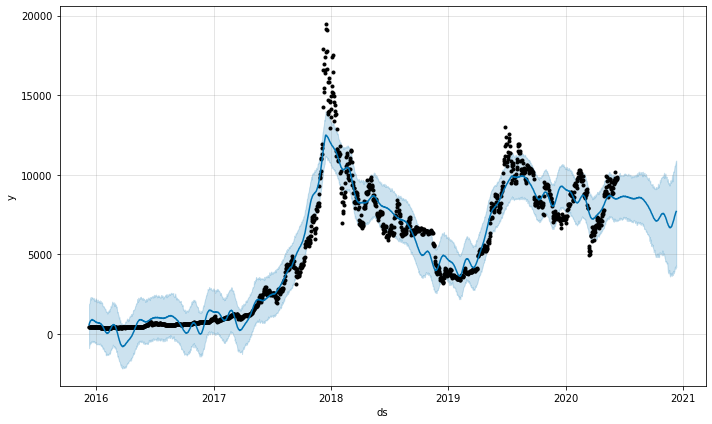

In [45]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = model.plot(forecast)

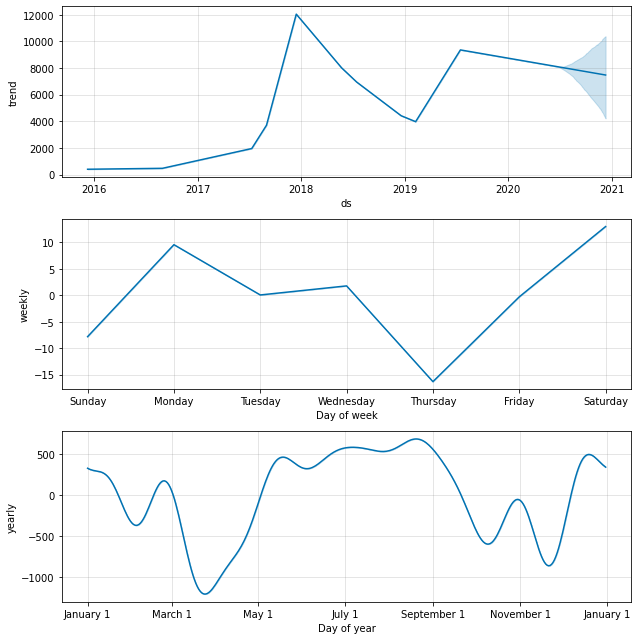

In [48]:
fig2 = m.plot_components(forecast)

Mean Absolute Error (Testing Data): 4214.384691
Root Mean Squared Error (Testing Data): 5479.017097
Hit Rate Prediction of Change in Direction(POCID): 55.494505


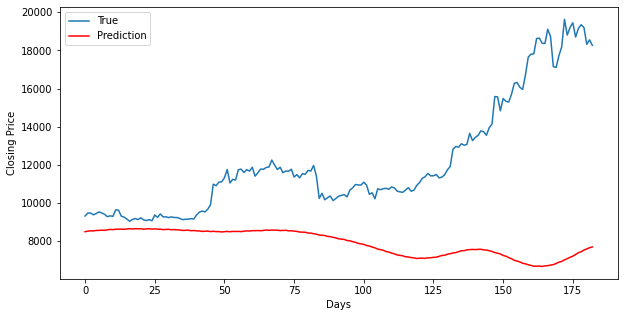

In [49]:
horizon_predicted = np.array(forecast['yhat'][training_size:])
inverse_test_data = scaler.inverse_transform(test_data.reshape(-1,1))

MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(mean_squared_error(inverse_test_data, horizon_predicted))
POCID_metric = POCID(inverse_test_data, horizon_predicted)

print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print('Hit Rate Prediction of Change in Direction(POCID): %.6f' % POCID_metric)

plt.figure(figsize = (10,5))
plt.plot(inverse_test_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()

# Aprendizado Profundo com LSTM
#### Experimentos com Redes Recorrentes LSTM

Vamos adicionar uma coluna com os valores de predição que queremos.

In [56]:
tickerDf['Target'] = tickerDf['Close'].shift(-1)
tickerDf.tail()

,Open,High,Low,Close,Volume,Mid,PC_change,Target
Date,,,,,,,,
2020-12-06,19154.179688,19390.500000,18897.894531,19345.121094,25293775714,19144.197266,0.009966,19191.630859
2020-12-07,19343.128906,19411.828125,18931.142578,19191.630859,26896357742,19171.485352,-0.007934,18321.144531
2020-12-08,19191.529297,19283.478516,18269.945312,18321.144531,31692288756,18776.711914,-0.045358,18553.916016
2020-12-09,18320.884766,18626.292969,17935.546875,18553.916016,34420373071,18280.919922,0.012705,18264.992188
2020-12-10,18553.298828,18553.298828,17957.064453,18264.992188,25547132265,18255.181641,-0.015572,NaN


Vamos remover a ultima linha já que fizemos o deslocamento dos valores de fechamento como 'Target' e ela agora apresenta um valor 'NaN'

In [57]:
tickerDf = tickerDf[:-1]

In [58]:
train_data = tickerDf.iloc[:training_size,:]
test_data = tickerDf.iloc[training_size:,:]

print(train_data.shape)
print(test_data.shape)

(1645, 8)
(182, 8)


# Keras Univariate LSTM example


Escalando os dados para o problema univariado

In [59]:
from sklearn.preprocessing import StandardScaler

# Training Data
scaler_dataframe = StandardScaler()
training_scaled = pd.DataFrame(scaler_dataframe.fit_transform(np.array(train_data['Close']).reshape(-1,1)))
#print(training_scaled.head())

# Testing Data
testing_scaled = pd.DataFrame(scaler_dataframe.transform(np.array(test_data['Close']).reshape(-1,1)))
#print(testing_scaled.head())

### Data Pre-Processing

Células LSTM no Tensorflow sempre experam receber uma estrutura tridimensional de [amostras/sequencias, timesteps, features] como entrada. A função abaixo retorna a matrix de sequencias (x) e o valor do rótulo a ser predito (y).


In [65]:
# Preparing data for the experiment with an univariate model -> You get the values for the columns and the label
# Getting Closing Price and arranging lists for training/testing based on the sequence

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)  
    return np.array(X), np.array(y)

Forma dos dados escalados antes do treinamento


In [68]:
training_scaled.shape

(1645, 1)

O formato do dado no final fica como -> [n° de amostras, janela / n° de timesteps, n° de features]

In [69]:
window_size = 5

train_univariate, y_train_univariate = split_sequence(np.array(training_scaled), window_size)
test_univariate, y_test_univariate = split_sequence(np.array(testing_scaled), window_size)

print(train_univariate.shape)
print(y_train_univariate.shape)

(1640, 5, 1)
(1640, 1)


In [71]:
pd.DataFrame(train_univariate[:, :, 0]).head()
#pd.DataFrame(y_train_univariate).head()

,0,1,2,3,4
0,-1.211176,-1.201879,-1.206199,-1.206516,-1.203857
1,-1.201879,-1.206199,-1.206516,-1.203857,-1.198467
2,-1.206199,-1.206516,-1.203857,-1.198467,-1.201115
3,-1.206516,-1.203857,-1.198467,-1.201115,-1.200824
4,-1.203857,-1.198467,-1.201115,-1.200824,-1.198902


### Vanilla LSTM for 1 step ahead prediction with univariate input

Model Fitting

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

n_steps = 5
n_features = 1

# Define model
model = Sequential()
model.add(LSTM(30, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
_ = model.fit(train_univariate, y_train_univariate, epochs=50, verbose = 1)

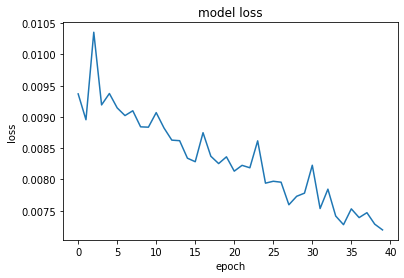

In [80]:
plt.plot(model.history.history['loss'][10:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Checando as métricas para os dados de teste

In [81]:
y_pred = []

for i in range(test_univariate.shape[0]):
    test = test_univariate[i].reshape((1, n_steps, n_features))
    y_pred.append(model.predict(test, verbose=0))
    
horizon_predicted = scaler_dataframe.inverse_transform(np.array(y_pred).reshape(-1))
inverse_test_data = scaler_dataframe.inverse_transform(np.array(y_test_univariate).reshape(-1))
                                                       
MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(mean_squared_error(inverse_test_data, horizon_predicted))
POCID_metric = POCID(inverse_test_data, horizon_predicted)

print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print('Hit Rate Prediction of Change in Direction(POCID): %.6f' % POCID_metric)

Mean Absolute Error (Testing Data): 300.487685
Root Mean Squared Error (Testing Data): 424.525996
Hit Rate Prediction of Change in Direction(POCID): 46.590909


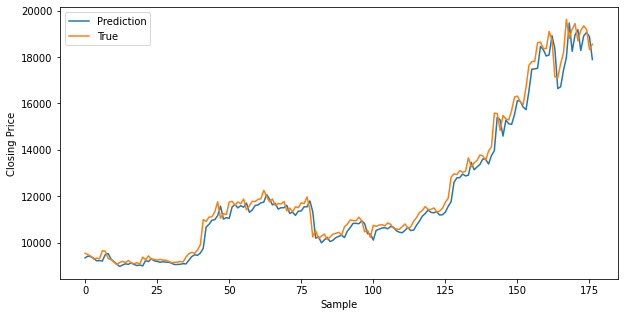

In [82]:
plt.figure(figsize = (10,5))

plt.plot(scaler_dataframe.inverse_transform(np.array(y_pred).reshape(-1)), label='Prediction')
plt.plot(scaler_dataframe.inverse_transform(np.array(y_test_univariate).reshape(-1)), label='True')
plt.xlabel('Sample')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)

plt.show()

### Stacked LSTM for 1 step ahead prediction with univariate input

In [83]:
# Define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit model
_ = model.fit(X, y, epochs=50, verbose = 0)

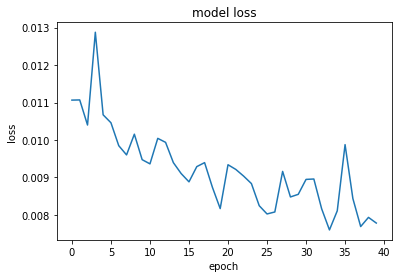

In [85]:
plt.plot(model.history.history['loss'][10:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Checando as métricas para os dados de teste

In [86]:
y_pred = []

for i in range(test_univariate.shape[0]):
    test = test_univariate[i].reshape((1, n_steps, n_features))
    y_pred.append(model.predict(test, verbose=0))

horizon_predicted = scaler_dataframe.inverse_transform(np.array(y_pred).reshape(-1))
inverse_test_data = scaler_dataframe.inverse_transform(np.array(y_test_univariate).reshape(-1))
                                                       
MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(mean_squared_error(inverse_test_data, horizon_predicted))
POCID_metric = POCID(inverse_test_data, horizon_predicted)

print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print('Hit Rate Prediction of Change in Direction(POCID): %.6f' % POCID_metric)

Mean Absolute Error (Testing Data): 246.026693
Root Mean Squared Error (Testing Data): 382.893846
Hit Rate Prediction of Change in Direction(POCID): 45.454545


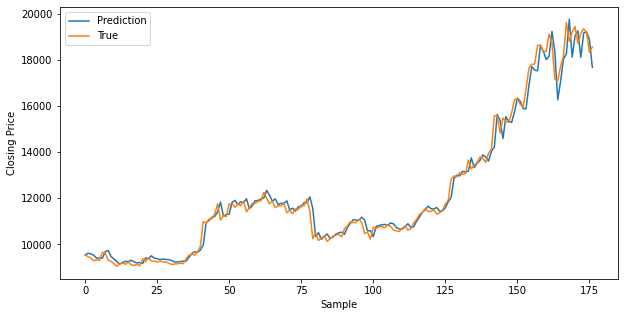

In [87]:
plt.figure(figsize = (10,5))

plt.plot(horizon_predicted, label='Prediction')
plt.plot(inverse_test_data, label='True')
plt.xlabel('Sample')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)

plt.show()

# Keras Multivariate LSTM example

Vamos utilizar outras variáveis que podem influenciar no preço do fechamento, além do próprio preço.

Escalando/normalizando o dataframe para podermos trabalhar com todas as colunas/variáveis normalizadas na rede neural

In [88]:
# Training Data

scaler_dataframe = StandardScaler()
training_scaled = pd.DataFrame(scaler_dataframe.fit_transform(np.array(train_data)))
#print(training_scaled.head())

# Testing Data
testing_scaled = pd.DataFrame(scaler_dataframe.transform(np.array(test_data)))
#print(testing_scaled.head())

# Scaler for the final output based on the Target column for the training set

closing_price_scaler = StandardScaler()
scaler_output = closing_price_scaler.fit(np.array(train_data['Target']).reshape(-1,1))

### Data Pre-Processing

As células LSTM no Tensorflow esperam receber uma estrutura tridimensional de [amostras/sequencias, timesteps, features] como entrada. A função abaixo retornará a matrix de sequencias (x) no formato especificado e o valor do rótulo a ser predito (y), com base na última coluna presente no dataframe (no nosso caso a 'Target').

In [90]:
# Os dados serão separados da mesma maneira -> [n° de amostras/sequencias, tamanho da janela/n° de steps, n° de features/variáveis]

def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [92]:
# Output shape: [n° de amostras, tamanho da janela / n° de steps, n° de features]
window_size = 10

train_multivariate, y_train_multivariate = split_sequences(np.array(training_scaled), window_size)
test_multivariate, y_test_multivariate = split_sequences(np.array(testing_scaled), window_size)

print(train_multivariate.shape)
print(y_train_multivariate.shape)

(1635, 10, 7)
(1635,)


### Stacked LSTM for 1 step ahead prediction with multivariate input

In [110]:
n_features = 7
n_steps = window_size = 10

# Define model
model = Sequential()
model.add(LSTM(10, activation='relu', return_sequences=True, input_shape=(window_size, n_features)))
model.add(LSTM(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit model
_ = model.fit(train_multivariate, y_train_multivariate, epochs=50, verbose=0)

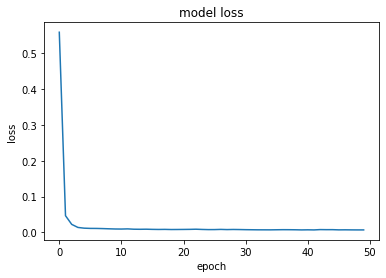

In [111]:
plt.plot(model.history.history['loss'][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Checando as métricas para os dados de teste

In [112]:
y_pred = []

for i in range(test_multivariate.shape[0]):
    test = test_multivariate[i].reshape((1, window_size, n_features))
    y_pred.append(model.predict(test, verbose=0))

horizon_predicted = closing_price_scaler.inverse_transform(np.array(y_pred).reshape(-1))
inverse_test_data = closing_price_scaler.inverse_transform(np.array(y_test_multivariate).reshape(-1))
                                                       
MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(mean_squared_error(inverse_test_data, horizon_predicted))
POCID_metric = POCID(inverse_test_data, horizon_predicted)

print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print('Hit Rate Prediction of Change in Direction(POCID): %.6f' % POCID_metric)

Mean Absolute Error (Testing Data): 653.801582
Root Mean Squared Error (Testing Data): 957.771534
Hit Rate Prediction of Change in Direction(POCID): 43.859649


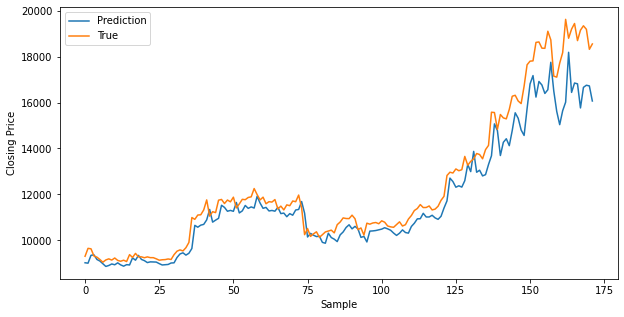

In [113]:
plt.figure(figsize = (10,5))

plt.plot(horizon_predicted, label='Prediction')
plt.plot(inverse_test_data, label='True')
plt.xlabel('Sample')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)

plt.show()

# Como melhorar ?

- Explorar melhor os parâmetros da LSTM
- Diferenciar os dados de entrada para tornar a série "estacionária" (Ex: biblioteca statsmodels)
- Explorar predição para multi-steps ahead (predições com horizonte maior que 1 https://machinelearningmastery.com/how-to-develop-multilayer-perceptron-models-for-time-series-forecasting/)
- Explorar outras variáveis que possam influenciar no preço de fechamento, como alguns indicadores técnicos -> Technical Analysis Library in Python (https://github.com/bukosabino/ta)



Amostra de uso da biblioteca TA
```
from ta import add_all_ta_features
# Add all ta features (42 Indicadores)
df = add_all_ta_features(
    df, open="Open", high="High", low="Low", close="Close", volume="Volume_BTC")
```

# Exercício

### Grupo (n° e nomes):
 - Joao do pé de feijão
 - ...
---

## Desafio da semana

Obter um modelo de predição "univariado" dos dados de fechamento da Criptomoeda Ethereum (ETH-USD)!

Execute as etapas a seguir:

* Obtenha os dados da moeda com o ticker (ETH-USD) dos últimos 5 anos
* Separe os dados entre treino e teste
* Normalize os dados
* Gere o dataset final de treino/teste utilizando a função auxiliar para ajuste das sequências e uma janela de 10
* Defina e treine o modelo com 2 camadas de LSTM com 50 neurônios em cada camada
* Obtenha as métricas e compare com o baseline de Médias Móveis

In [114]:
# Obtenção dos dados ETH-USD para os últimos 5 anos

tickerSymbol = 'ETH-USD'

start = '2015-12-18'
end = '2020-12-17'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start=start, end=end)

tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-12-18,0.938327,0.939493,0.908081,0.920127,300787,0,0
2015-12-19,0.921524,0.925874,0.888916,0.908072,343535,0,0
2015-12-20,0.908240,0.943185,0.899441,0.903885,472164,0,0
2015-12-21,0.906065,0.917390,0.891182,0.900771,549113,0,0
2015-12-22,0.894973,0.909526,0.862059,0.864202,454249,0,0


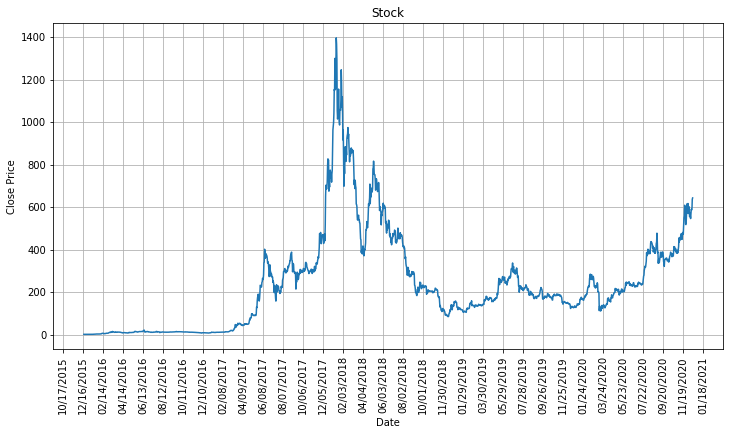

In [115]:
plot_stock(tickerDf, 'Close')

In [ ]:
# Separação inicial dos dados em treino e teste

training_size = round(tickerDf.shape[0]*0.9)
test_size = tickerDf.shape[0] - training_size

train_data = tickerDf['Close'].iloc[:training_size]
test_data = tickerDf['Close'].iloc[training_size:]

print(train_data.shape)
print(test_data.shape)

(1644,)
(183,)


In [ ]:
# Normalização

from sklearn.preprocessing import StandardScaler

# Training Data

scaler_dataframe = StandardScaler()
training_scaled = pd.DataFrame(scaler_dataframe.fit_transform(np.array(train_data).reshape(-1,1)))
#print(training_scaled.head())

# Testing Data
testing_scaled = pd.DataFrame(scaler_dataframe.transform(np.array(test_data).reshape(-1,1)))
#print(testing_scaled.head())

In [ ]:
# Função de separação em sequencias de treino e teste

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)  
    return np.array(X), np.array(y)

In [ ]:
window_size = 10
n_features = 1

train_univariate, y_train_univariate = split_sequence(np.array(training_scaled), window_size)
test_univariate, y_test_univariate = split_sequence(np.array(testing_scaled), window_size)

print(train_univariate.shape)
print(y_train_univariate.shape)
print(test_univariate.shape)
print(y_test_univariate.shape)

# Choose a number of time steps
n_steps = train_univariate.shape[1]

(1634, 10, 1)
(1634, 1)
(173, 10, 1)
(173, 1)


In [ ]:
# Definição e treinamento do modelo

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

# Define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit model
_ = model.fit(train_univariate, y_train_univariate, epochs=50, verbose = 0)

Mean Absolute Error (Testing Data): 14.490419
Root Mean Squared Error (Testing Data): 19.889449
Hit Rate Prediction of Change in Direction(POCID): 48.837209


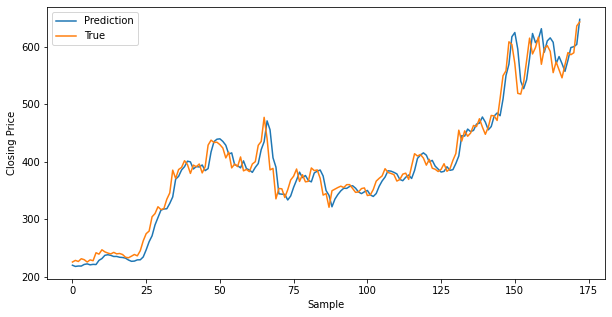

In [ ]:
# Obtenção das métricas

y_pred = []

for i in range(test_univariate.shape[0]):
    test = test_univariate[i].reshape((1, n_steps, n_features))
    y_pred.append(model.predict(test, verbose=0))
    
horizon_predicted = scaler_dataframe.inverse_transform(np.array(y_pred).reshape(-1))
inverse_test_data = scaler_dataframe.inverse_transform(np.array(y_test_univariate).reshape(-1))
                                                       
MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(mean_squared_error(inverse_test_data, horizon_predicted))
POCID_metric = POCID(inverse_test_data, horizon_predicted)

print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print('Hit Rate Prediction of Change in Direction(POCID): %.6f' % POCID_metric)

plt.figure(figsize = (10,5))

plt.plot(scaler_dataframe.inverse_transform(np.array(y_pred).reshape(-1)), label='Prediction')
plt.plot(scaler_dataframe.inverse_transform(np.array(y_test_univariate).reshape(-1)), label='True')
plt.xlabel('Sample')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)

plt.show()

Mean Absolute Error (Testing Data): 22.428403
Root Mean Squared Error (Testing Data): 31.004698
Hit Rate Prediction of Change in Direction(POCID): 45.054945


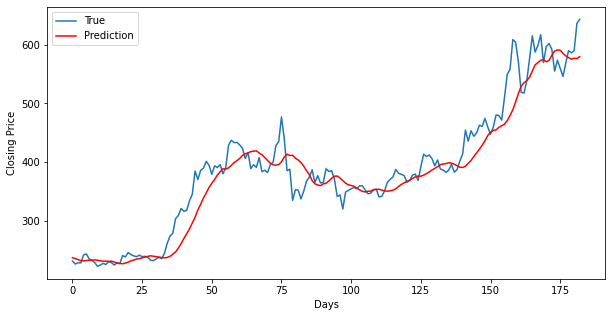

In [ ]:
# Comparação com médias móveis

train_data = np.array(tickerDf['Close'][:training_size])
test_data = np.array(tickerDf['Close'][training_size:])

window_size = 10
Actual = [x for x in train_data]
predictions = list()

for timepoint in range(len(test_data)):
    ActualValue =  test_data[timepoint]
    forecast = moving_window_average(Actual, window_size) 
    #print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    predictions.append(forecast)
    Actual.append(ActualValue) 

horizon_predicted = np.array(predictions).reshape(-1,1)
inverse_test_data = np.array(test_data).reshape(-1,1)

MAE = mean_absolute_error(inverse_test_data, horizon_predicted)
RMSE = np.sqrt(mean_squared_error(inverse_test_data, horizon_predicted))

POCID_metric = POCID(inverse_test_data, horizon_predicted)

print('Mean Absolute Error (Testing Data): %.6f' % MAE)
print('Root Mean Squared Error (Testing Data): %.6f' % RMSE)
print('Hit Rate Prediction of Change in Direction(POCID): %.6f' % POCID_metric)

plt.figure(figsize = (10,5))
plt.plot(inverse_test_data, label='True')
plt.plot(horizon_predicted, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(fontsize=10)
plt.show()